## Suppose you are appointed as a Data scientist in any Pharma Company. That company makes medicine for heart disease. Your senior manager has given several clinical parameters about a patient, can you predict whether or not the patient has heart disease?

## There are following thirteens clinical parameters of the patient.

## 1. age - age in years
## 2. sex - (1 = male; 0 = female)
## 3. cp - chest pain type

## 0: Typical angina: chest pain related decrease blood supply to the heart
## 1: Atypical angina: chest pain not related to heart
## 2: Non-anginal pain: typically esophageal spasms (non heart related)
## 3: Asymptomatic: chest pain not showing signs of disease
## 4. trtbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
## 5. chol - serum cholestoral in mg/dl

## serum = LDL + HDL + .2 * triglycerides 
## above 200 is cause for concern
## 6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

## &#39;&gt;126&#39; mg/dL signals diabetes
## 7. restecg - resting electrocardiographic results

## 0: Nothing to note
## 1: ST-T Wave abnormality
## 1. can range from mild symptoms to severe problems
## 2. signals non-normal heart beat
## 2: Possible or definite left ventricular hypertrophy
## 1. Enlarged heart&#39;s main pumping chamber
## 8. thalachh - maximum heart rate achieved

## 9. exng - exercise induced angina (1 = yes; 0 = no)

## 10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

## 11. slp - the slope of the peak exercise ST segment

 ## 0: Upsloping: better heart rate with excercise (uncommon)
 ## 1: Flatsloping: minimal change (typical healthy heart)
 ## 2: Downslopins: signs of unhealthy heart
## 12. caa - number of major vessels (0-3) colored by flourosopy

## colored vessel means the doctor can see the blood passing through
## the more blood movement the better (no clots)
## 13. thall - thalium stress result

## 1,3: normal
## 6: fixed defect: used to be defect but ok now
## 7: reversable defect: no proper blood movement when excercising
## 14. output - have disease or not (1=yes, 0=no) (= the predicted attribute)

## When you working on the health of patients then accuracy is deciding factor, Apply different machine learning algorithms and check the accuracy about predicting whether or not the patient has heart disease.

## Apply all five different machine learning models Logistic Regression, K-Nearest Neighbours Classifier, Support Vector machine, Decision Tree Classifier, Random Forest Classifier onthe given dataset.

In [9]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df=pd.read_csv("heart.csv")
df1=df


In [11]:

df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df1.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df1.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
df1['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [16]:
#1 for has disease
#0 for no disease
feature=list(set(df1.columns)-set(['output']))
feature
['oldpeak',
 'sex',
 'thalachh',
 'caa',
 'age',
 'fbs',
 'exng',
 'cp',
 'slp',
 'trtbps',
 'restecg',
 'chol',
 'thall']
target=list(['output'])
target

['output']

## performing EDA on the given dataset
## histograms

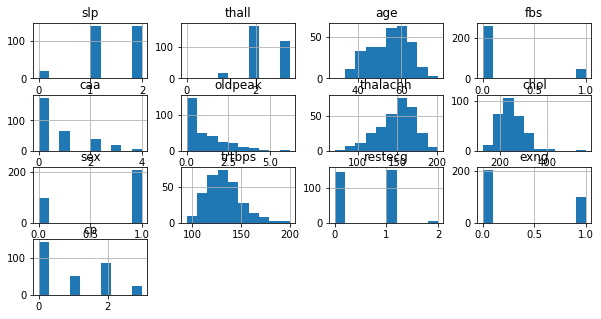

In [17]:

df1[feature].hist(figsize=(10, 5));

## cross correaltion

<AxesSubplot:>

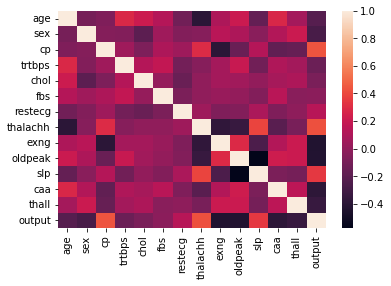

In [18]:
correlation=df1.corr()
sns.heatmap(correlation)


<AxesSubplot:>

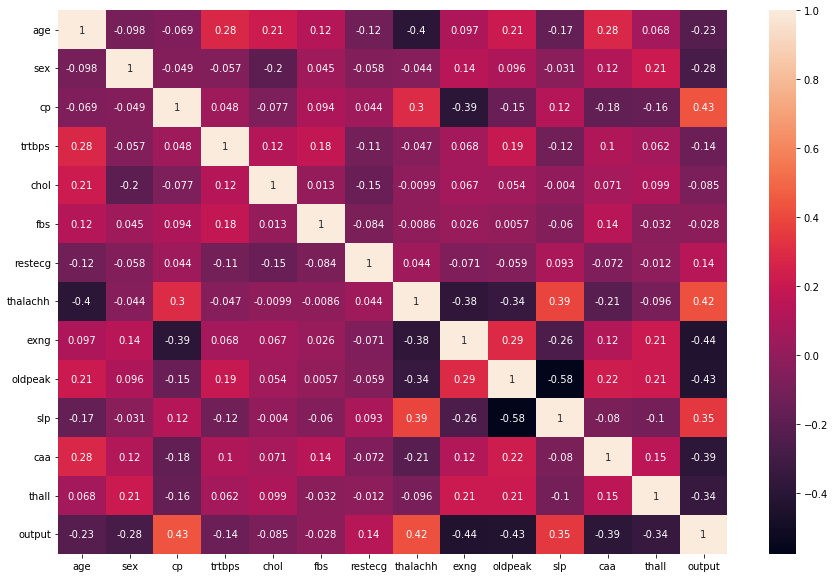

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)


In [20]:
x=df1[feature]
x.head()

,slp,thall,age,fbs,caa,oldpeak,thalachh,chol,sex,trtbps,restecg,exng,cp
0,0,1,63,1,0,2.3,150,233,1,145,0,0,3
1,0,2,37,0,0,3.5,187,250,1,130,1,0,2
2,2,2,41,0,0,1.4,172,204,0,130,0,0,1
3,2,2,56,0,0,0.8,178,236,1,120,1,0,1
4,2,2,57,0,0,0.6,163,354,0,120,1,1,0


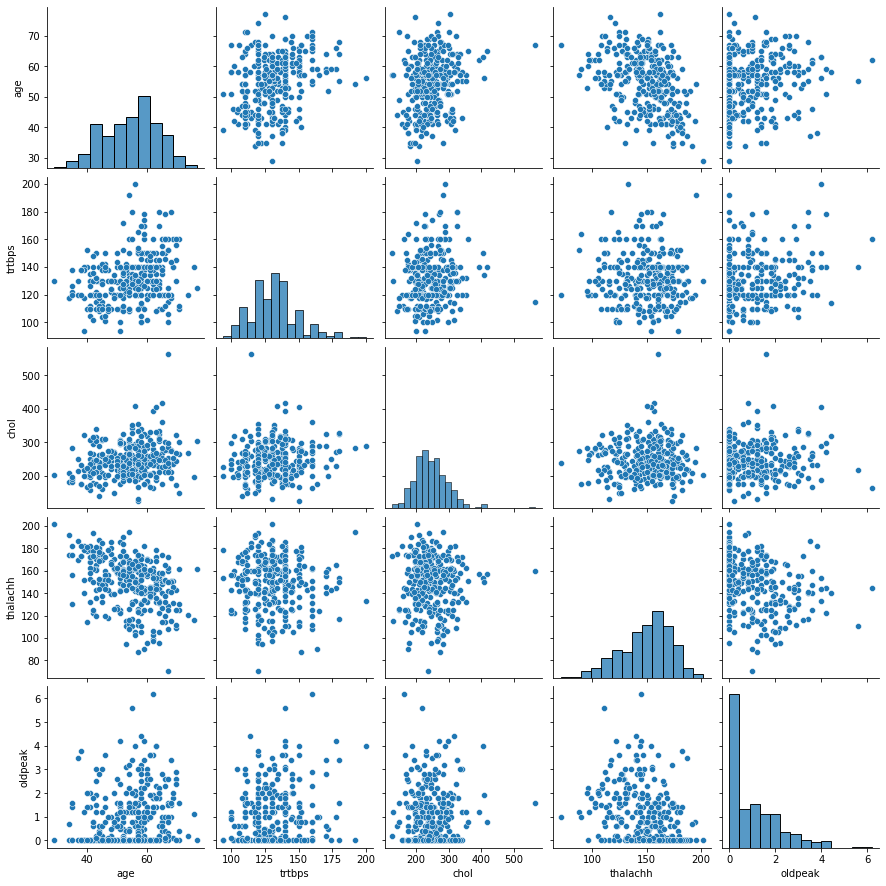

In [21]:
subData = df1[['age','trtbps','chol','thalachh','oldpeak']]
sns.pairplot(subData)


In [22]:
#Violin & Box Plots


Text(0, 0.5, 'Thalach Level for violin data')

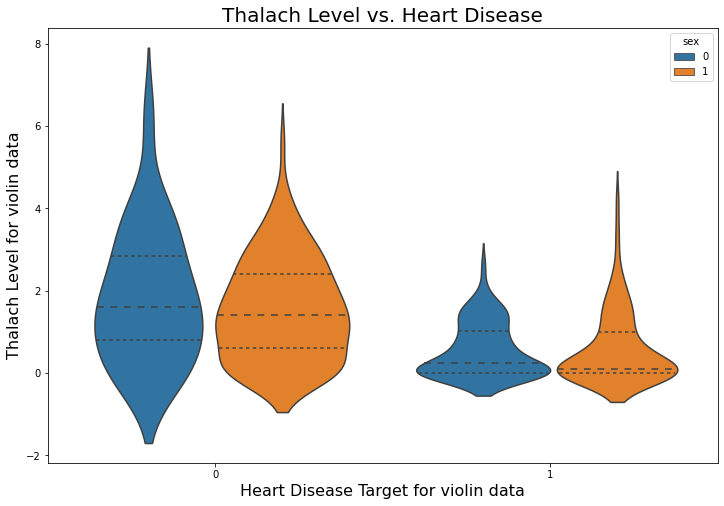

In [23]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'output', y= 'oldpeak',hue="sex", 
inner='quartile',data= df1 )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target for violin data", fontsize=16)
plt.ylabel("Thalach Level for violin data", fontsize=16)


Text(0, 0.5, 'ST depression induced by exercise relative to rest')

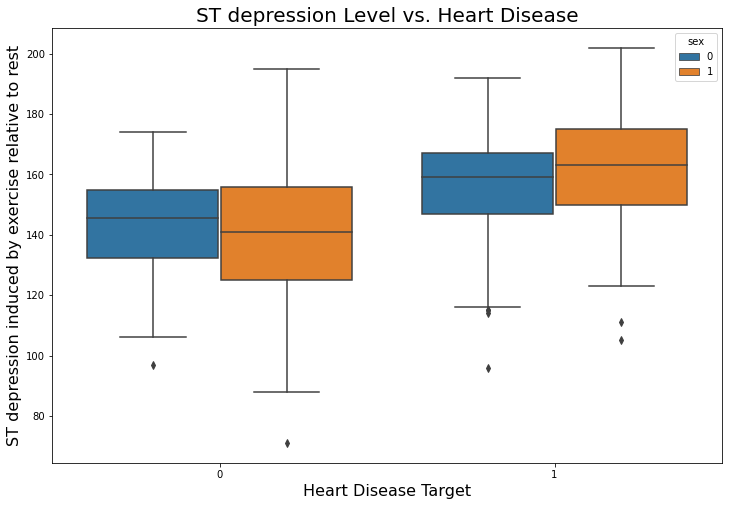

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'output', y= 'thalachh',hue="sex", data=df1)
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", 
fontsize=16)


In [25]:
#split: the data set into the Training set and Test set.
x=df1[feature]
y=df1[target]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =
0.3, random_state = 100)

In [ ]:
#Normalize: Standardizing the data will transform the data so that its distribution will have 
#a mean of 0 and a standard deviation of 1.

In [26]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)


## SUPERVISED LARNING ALGORITHMS ARE

#Logistic Regression, K-NN (k-Nearest Neighbours), SVM (Support Vector Machine), 
Decision Trees, Random Forest

## Logistic Regression

In [27]:

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression


In [28]:
m1 = LogisticRegression(random_state=1) # get instance of model
m1.fit(x_train, y_train) # Train/Fit model 
y_pred1 = m1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        46
           1       0.82      0.91      0.86        45

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# ACCURACY 86%

## K-NN (K-Nearest Neighbors)

In [29]:
#The report shows the main classification metrics precision, recall and f1-score on a per-class basis
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier() # get instance of model
m2.fit(x_train, y_train) # Train/Fit model 
y_pred2 = m2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy


              precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.85      0.89      0.87        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



C:\Users\91830\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#ACCURACY 87


## SVM (Support Vector Machine)


In [30]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
m3 = SVC(random_state=1) # get instance of model
m3.fit(x_train, y_train) # Train/Fit model 
y_pred3 = m3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.82      0.93      0.87        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#ACCYRACY 87

## Decision Trees

In [31]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
m4 = DecisionTreeClassifier(random_state=1) # get instance of model
m4.fit(x_train, y_train) # Train/Fit model 
y_pred4 = m4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accurac

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        46
           1       0.72      0.80      0.76        45

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [ ]:
#ACCURACY 74

## Random Forest

In [32]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
m5 = RandomForestClassifier(random_state=1)# get instance of model
m5.fit(x_train, y_train) # Train/Fit model 
y_pred5 = m5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

C:\Users\91830\AppData\Local\Temp\ipykernel_19196\1258187335.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m5.fit(x_train, y_train) # Train/Fit model


              precision    recall  f1-score   support

           0       0.90      0.76      0.82        46
           1       0.79      0.91      0.85        45

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
#ACCURACY 84

## CONFUSION MATRIX

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)


[[35 11]
 [ 4 41]]


0.8351648351648352

In [35]:
#Our Random Forest algorithm yields the highest accuracy, 84%. Any accuracy above 70% isconsidered good,

In [ ]:
#If accuracy if too good it will become overfitting ,which is RF is a good algorithm for our dataset

In [ ]:
#Out of the 13 features we examined, the top 4 significant features that helped us classifybetween a positive & negative Diagnosis were chest pain type (cp), maximum heart rate 
#achieved (thalach), number of major vessels (ca), and ST depression induced by exercise 
#relative to rest (oldpeak)